K-Means, DBSCAN

In [14]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=42)

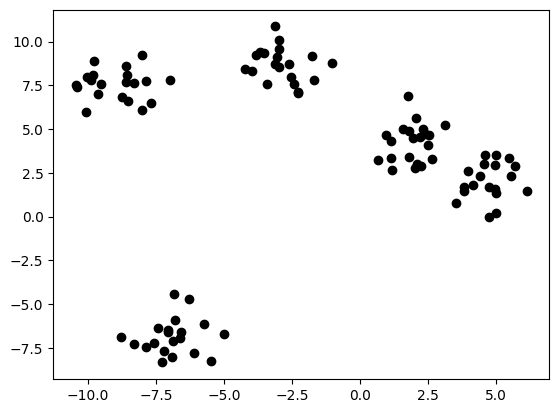

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

points_df = pd.DataFrame(points, columns=['X', 'Y'])
ax.scatter(points[:, 0], points[:, 1], c='black')

In [16]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=5)
kmeans_cluster.fit(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

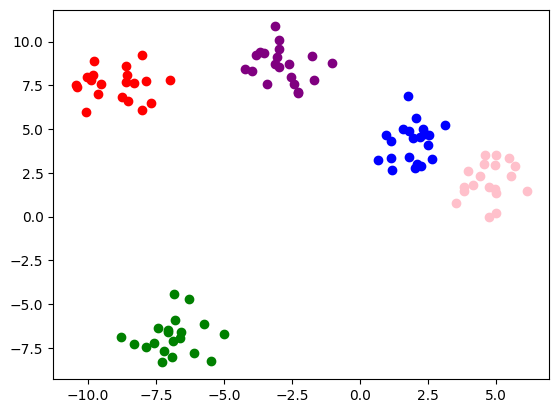

In [17]:
color=['red','blue','green','pink','purple']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color[cluster], label='cluster_{}'.format(cluster))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


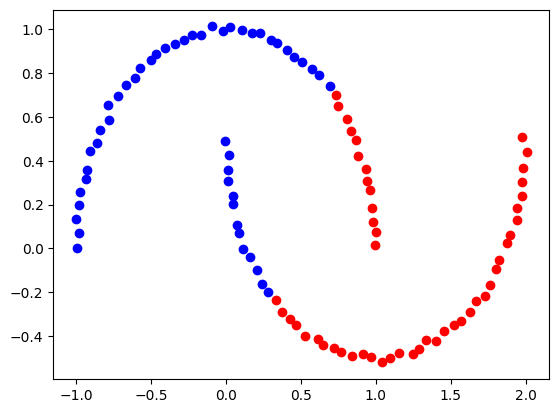

In [18]:
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100, noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color[cluster], label='cluster_{}'.format(cluster))

# of cluster: 2


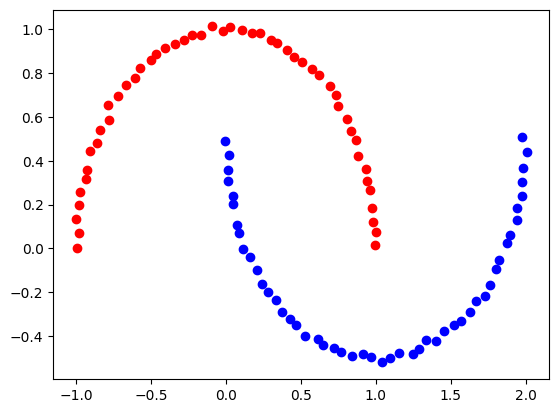

In [19]:
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color[cluster], label='cluster_{}'.format(cluster))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

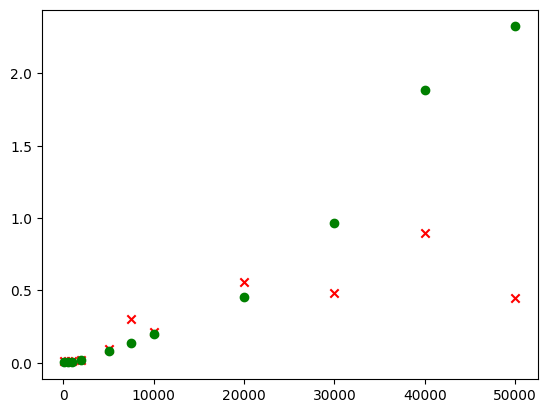

In [20]:
import time
from sklearn.datasets import make_circles

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01)

    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')

k-means 적용-iris

In [21]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [22]:
kmeans = KMeans(n_clusters=4,max_iter=300)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_

In [24]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,2


In [25]:
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          23
        3          27
2       0          17
        2          32
        3           1
Name: sepal_length, dtype: int64


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


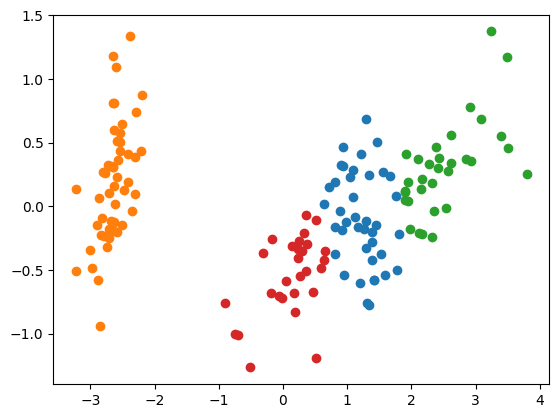

In [28]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index
marker3_ind = irisDF[irisDF['cluster']==3].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'])
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'])
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'])
plt.scatter(x=irisDF.loc[marker3_ind,'pca_x'], y=irisDF.loc[marker3_ind,'pca_y'])

plt.show()

DBSCAN 적용-iris

In [29]:
iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [34]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',alpha=0.9, edgecolor='k')
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k')
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

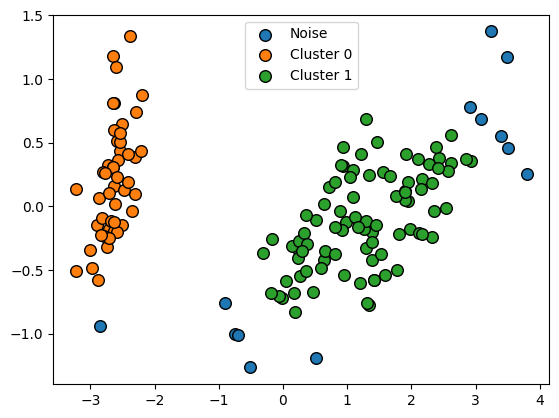

In [36]:
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)